   ## Dimensionality Reduction and Analysis of Sea Surface Height over the Gulf of Mexico
   
   
   The goal of this project is the analysis of simulation model outputs of Sea Surface Height data over the Gulf of Mexico. The data consists in simulations of a dynamical system on this area for a period of time covering 20 years, using around 50 different initial conditions. For each time date, the data is an image of around 70x80 pixels.
   
   The dataset is huge and hard to analyze fully as is. Dimensionality reduction can be helpful for several tasks:
   - It allows to summarize the information in the data in a reduced number of variables
   - It can be used to compress the data, or to reduce the computation time for expensive tasks
   - It helps interpreting the data by providing "modes" that capture general patterns which are representative of the whole data behavior
   
   

## Import useful libraries, and open one file for testing

In [12]:
# !pip install netCDF4

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import pickle

# local path
dirDATA      = '/home/administrateur/Documents/donnees/oceano/Data/Data_project_dsgc/'

# from google.colab import drive
# drive.mount("/content/gdrive/")

# !ls "/content/gdrive/My Drive/data_dsg/"

# path = "/content/gdrive/My Drive/data_dsg/"
# dirDATA = path

genFilename = 'GOM025.GSL301_m0'
genSuffix   = '_1d_dtrend.nc'
#genSuffix   = '_H_diff.nc'
NbFile      = 50
NbRandDates = 500  # number of random dates selected for each member for PCA and autoencoding

# NbRandDates = 10  # number of random dates selected for each member for PCA and autoencoding

SelectedField = 'ssht'
    
plt.rcParams['figure.figsize'] = [12, 7] 
# plt.rcParams['figure.figsize'] = [24,14] 
    
    
latBounds = [17,32]
lonBounds = [-99,-79]

.... reading file /home/administrateur/Documents/donnees/oceano/Data/Data_project_dsgc/GOM025.GSL301_m003_1d_dtrend.ncROI.pkl
0.5328698


Text(0,0.5,'ssh')

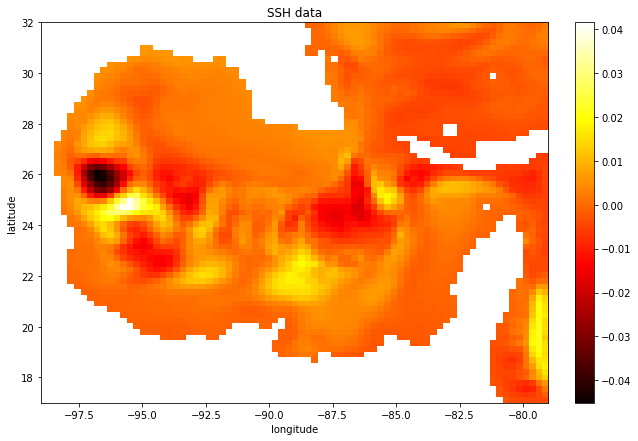

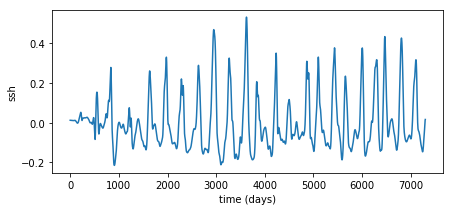

In [13]:
# test for reading a given member

filename = dirDATA+genFilename+'03'+genSuffix+'ROI.pkl'
    
filehandler = open(filename, 'rb') 
SelectedField = pickle.load(filehandler)
latBounds = pickle.load(filehandler)
lonBounds = pickle.load(filehandler)
indNoNaN = pickle.load(filehandler)
indlat = pickle.load(filehandler)
indlon = pickle.load(filehandler)

flagRemoveHF = pickle.load(filehandler)
flagRemoveMean = pickle.load(filehandler)
sigmaFilt = pickle.load(filehandler)

sstROI = pickle.load(filehandler)
sshROI = sstROI # In python this is just copying a reference to the object
    
print('.... reading file %s'%(filename))     


imgplot = plt.imshow(sstROI[45,:,:],extent=(lonBounds[0],lonBounds[1],latBounds[0],latBounds[1]))
imgplot.set_cmap('hot')
plt.axis('image')
plt.title('SSH data')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(fraction=0.04, pad=0.04)


# plotting the time series at a given point

print(np.amax(sshROI[:,40,40]))

fig = plt.figure(figsize=(7,3))

plt.plot(sshROI[:,40,40])
plt.xlabel('time (days)')
plt.ylabel('ssh')

## Plot interactively the whole time series for a given member

In [9]:
# # Plotting the whole time series

# # Importing ipywidgets for interactive plotting
# from ipywidgets import *
# import matplotlib.cm as cm
# from mpl_toolkits.mplot3d import Axes3D

# # define a function that will plot the image for a given time t

# def plt_ssh(t):
#     .....
    


# # interactive plot u(x,y,t) for varying t
# interact(plt_ssh, t=(0,2300,1))

## Prepare the data for analysis

In [14]:
# Concatenate all members (with some random indices because otherwise the matrix gets too big) to get the principal components

from scipy import ndimage
sigmaFilt    = 10
flagRemoveHF = 1

for kk in range(1,NbFile):
    
 
    filename = dirDATA+genFilename+"0%d"%(kk)+genSuffix+'ROI.pkl'
    
    if not(os.path.isfile(filename)):
        kk = kk + 1
        continue
    
    filehandler = open(filename, 'rb')

    
    
    SelectedField = pickle.load(filehandler)
    latBounds = pickle.load(filehandler)
    lonBounds = pickle.load(filehandler)
    indNoNaN = pickle.load(filehandler)
    indlat = pickle.load(filehandler)
    indlon = pickle.load(filehandler)

    flagRemoveHF = pickle.load(filehandler)
    flagRemoveMean = pickle.load(filehandler)
    sigmaFilt = pickle.load(filehandler)

    sstROI = pickle.load(filehandler)
    sshROI = sstROI # In python this is just copying a reference to the object
    

        
    NbSSTDates = sstROI.shape[0]
    indRand    = np.random.permutation(NbSSTDates)[0:NbRandDates] # choose a certain number of random indices in the time series

    sshROI_small = sshROI[indRand,:,:]
    
    ## concatenate SST data
    if kk == 2:
        sstAllROI = sshROI_small.copy()
    else:
        sstAllROI = np.concatenate((sstAllROI,sshROI_small),axis=0)

    print('.... reading file %s - shape = %d %d %d'%(filename,sstAllROI.shape[0],sstAllROI.shape[1],sstAllROI.shape[2]))

.... reading file /home/administrateur/Documents/donnees/oceano/Data/Data_project_dsgc/GOM025.GSL301_m002_1d_dtrend.ncROI.pkl - shape = 500 67 77
.... reading file /home/administrateur/Documents/donnees/oceano/Data/Data_project_dsgc/GOM025.GSL301_m003_1d_dtrend.ncROI.pkl - shape = 1000 67 77
.... reading file /home/administrateur/Documents/donnees/oceano/Data/Data_project_dsgc/GOM025.GSL301_m004_1d_dtrend.ncROI.pkl - shape = 1500 67 77
.... reading file /home/administrateur/Documents/donnees/oceano/Data/Data_project_dsgc/GOM025.GSL301_m005_1d_dtrend.ncROI.pkl - shape = 2000 67 77
.... reading file /home/administrateur/Documents/donnees/oceano/Data/Data_project_dsgc/GOM025.GSL301_m006_1d_dtrend.ncROI.pkl - shape = 2500 67 77
.... reading file /home/administrateur/Documents/donnees/oceano/Data/Data_project_dsgc/GOM025.GSL301_m007_1d_dtrend.ncROI.pkl - shape = 3000 67 77
.... reading file /home/administrateur/Documents/donnees/oceano/Data/Data_project_dsgc/GOM025.GSL301_m008_1d_dtrend.ncR

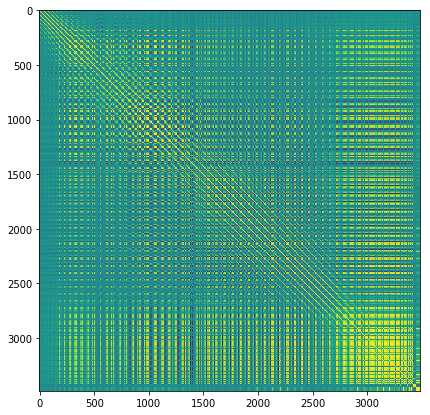

In [28]:
sstAllROI_vec   = np.reshape(sstAllROI,(sstAllROI.shape[0],sstAllROI.shape[1]*sstAllROI.shape[2]))
indNoNaN = np.where( sstAllROI_vec[0,:] == sstAllROI_vec[0,:] )


plt.figure()
sstAllROI_reshaped = (np.transpose(sstAllROI_vec))



sshAllROI_vec_no_nan   = sstAllROI_vec[:,indNoNaN[0]]

sshAllROI_vec_no_nan

# a = np.cov(sshAllROI_vec_no_nan)
b = np.corrcoef(np.transpose(sshAllROI_vec_no_nan))

plt.imshow(b)